   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

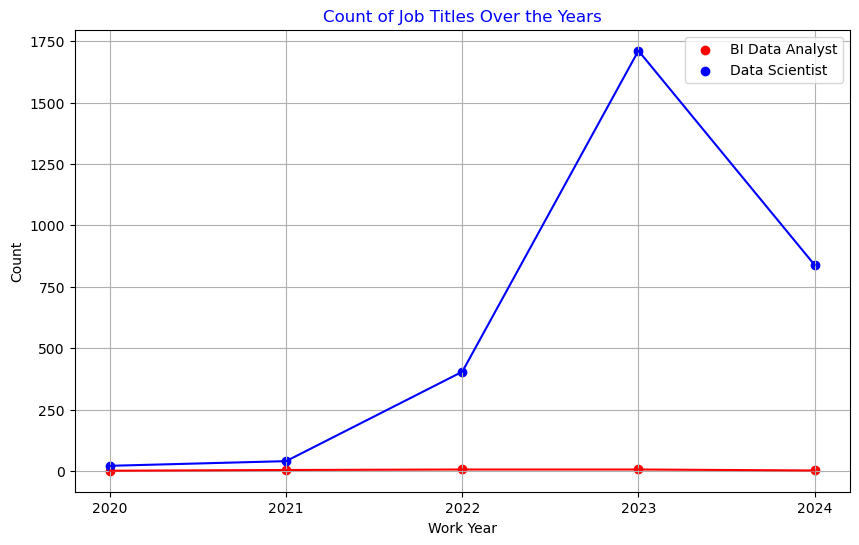

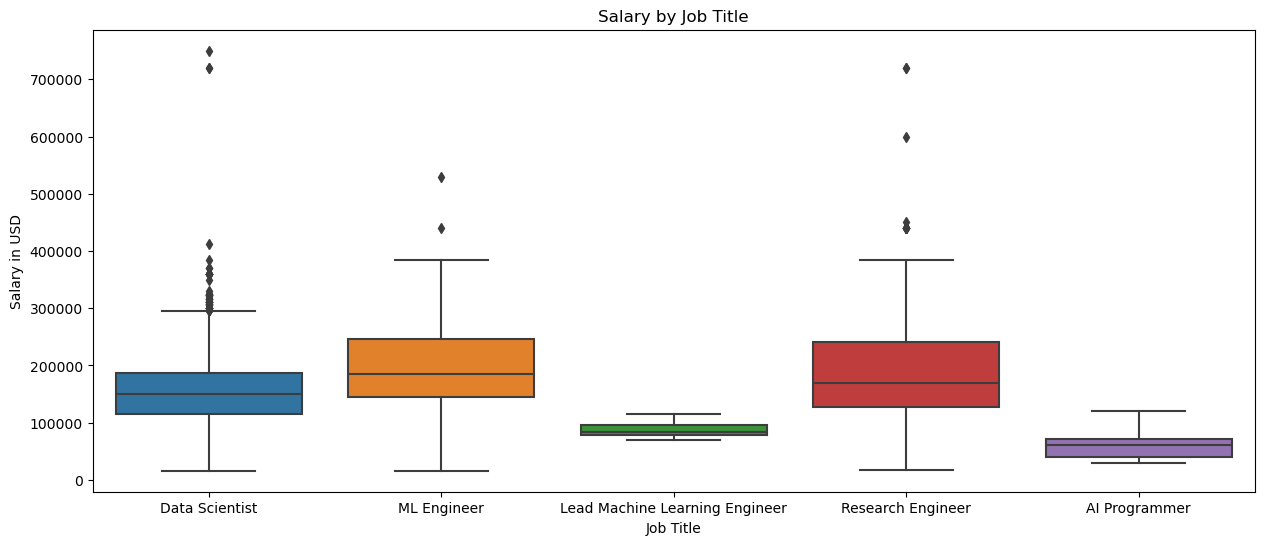

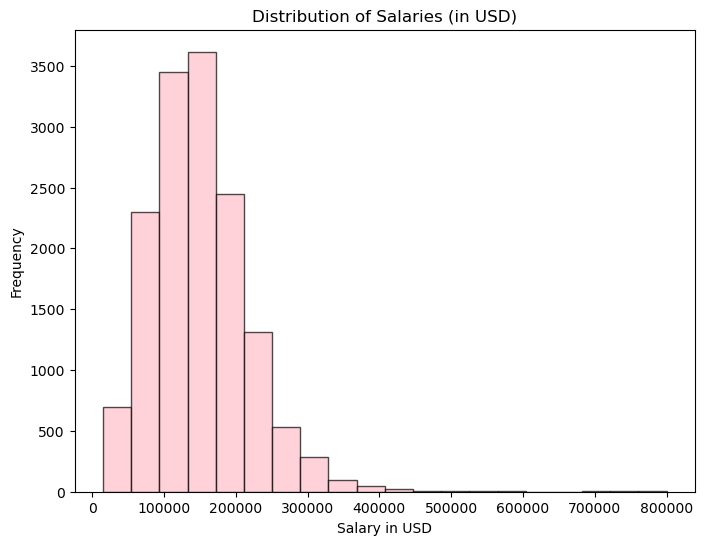

,Count,Mean,Std Dev,Min,25%,50% (Median),75%,Max,Correlation,Median,Skewness,Kurtosis
work_year,14838.0,2023.138900,0.700799,2020.0,2023.0,2023.0,2024.0,2024.0,0.202898,2023.0,-0.807535,1.760321
salary,14838.0,165022.718965,356235.426522,14000.0,102100.0,142200.0,187500.0,30400000.0,0.268308,142200.0,50.014242,3694.821030
salary_in_usd,14838.0,149874.718763,69009.181349,15000.0,102000.0,141300.0,185900.0,800000.0,0.288589,141300.0,1.522785,7.844071
remote_ratio,14838.0,32.760480,46.488278,0.0,0.0,0.0,100.0,100.0,0.187367,0.0,0.734600,-1.438608


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


#line plot_&_scatter plot
def plot_bi_data_analyst_and_datascientist_salary_over_time(df):
    """
    Plots the count of 'work_year' occurrences over time for 'BI Data Analyst' and 'Data Scientist' positions.

    Parameters:
    - df (DataFrame): The DataFrame containing job data, including 'job_title' and 'work_year' data.

    This function filters the DataFrame to include only rows for 'BI Data Analyst' and 'Data Scientist' positions.
    It then calculates the count of occurrences for each work year within these roles and generates a line plot
    with scatter points, allowing for comparison of the distribution of work years between the two job titles.
    """
    
    plt.figure(figsize=(10, 6))
    bi_data_analyst = df[df['job_title'] == 'BI Data Analyst']
    yearly_counts_bi = bi_data_analyst['work_year'].value_counts().sort_index()
    data_scientist = df[df['job_title'] == 'Data Scientist']
    yearly_counts_ds = data_scientist['work_year'].value_counts().sort_index()
    plt.scatter(yearly_counts_bi.index, yearly_counts_bi.values, marker='o', color='red', label='BI Data Analyst')
    plt.plot(yearly_counts_bi.index, yearly_counts_bi.values, linestyle='-', color='red')
    plt.scatter(yearly_counts_ds.index, yearly_counts_ds.values, marker='o', color='blue', label='Data Scientist')
    plt.plot(yearly_counts_ds.index, yearly_counts_ds.values, linestyle='-', color='blue')
    plt.title("Count of Job Titles Over the Years",color="blue")
    plt.xlabel("Work Year")
    plt.xticks(range(bI_Data_Analyst['work_year'].min(), bI_Data_Analyst['work_year'].max() + 1))
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.show()


#boxplot
def plot_salary_by_job_title(file_path, job_titles, figsize=(15, 6)):
    """
    Plots a boxplot of salaries by job title from a specified CSV file.
    
    Parameters:
    - file_path (str): Path to the CSV file containing the dataset.
    - job_titles (list of str): List of job titles to include in the plot.
    - figsize (tuple): Figure size for the plot, default is (10, 6).
    
    the dataset to include only specified job titles,
    then generates and displays a boxplot of salaries in USD for each title.
    """
    filtered_df = df[df['job_title'].isin(job_titles)]
    plt.figure(figsize=figsize)
    sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_df)
    plt.title("Salary by Job Title")
    plt.xlabel("Job Title")
    plt.ylabel("Salary in USD")
    plt.show()


#histplot
def plot_salary_distribution(df, figsize=(8, 6)):
    """
    Plots the distribution of salaries in USD with a histogram.
    Parameters:
    - df (DataFrame): The DataFrame containing the data with a 'salary_in_usd'.
    - figsize (tuple): The dimensions of the figure for the plot, default is (8, 6).
    
    The function generates a histogram with a KDE overlay to visualize the distribution of salary values.
    """
    plt.figure(figsize=figsize)
    plt.hist(df['salary_in_usd'], bins=20, color='pink', edgecolor='black', alpha=0.7)
    plt.title("Distribution of Salaries (in USD)")
    plt.xlabel("Salary in USD")
    plt.ylabel("Frequency")
    plt.show()


#calculate statistics for numerical columns
def all_calStatics(df):
    """
    all_calculate Statics data for numerical columns.

    Parameters:
    - df: DataFrame having numerical data.

    Returns:
    - all_calStatics_df: DataFrame containing statistics such as count, mean, standard deviation, 
                     minimum, 25th percentile, median, 75th percentile, maximum, skewness, 
                     kurtosis, and median for each numerical column.
    """
    num_col_data = df.select_dtypes(include=['int', 'float']).columns
    moments = df[num_col_data].describe().transpose()
    skewness = df[num_col_data].skew()
    kurtosis = df[num_col_data].kurt()
    median = df[num_col_data].median()
    correlation = df[num_col_data].corr().mean(axis=1)
    all_calStatics_df = pd.concat([moments, correlation, median, skewness, kurtosis], axis=1)
    all_calStatics_df.columns = [
        'Count', 'Mean', 'Std Dev', 'Min', '25%', '50% (Median)', '75%', 'Max', 
        'Correlation', 'Median', 'Skewness', 'Kurtosis']

    return all_calStatics_df


#------------------------#
df=pd.read_csv("DataScience.csv")
print(df.head())
print(df.isnull().sum())
plot_bi_data_analyst_and_datascientist_salary_over_time(df)
job_titles= ["Lead Machine Learning Engineer", "Data Scientist", "AI Programmer", "Research Engineer", "ML Engineer"]
plot_salary_by_job_title("DataScience.csv", job_titles)
plot_salary_distribution(df)
all_calStatics(df)